# Lecture 6 - SciPy

What we have seen so far
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Interpolation : `scipy.interpolate`

In [ ]:
import scipy.interpolate as interp

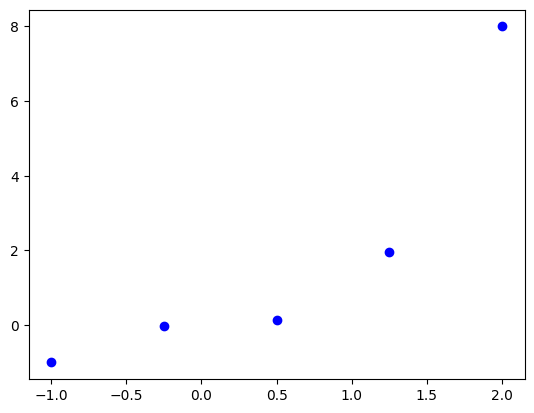

In [ ]:
x = np.linspace(-1,2,5);
y = x**3
plt.plot(x,y,'bo')

In [ ]:
f = interp.interp1d(x,y,kind="linear")

In [ ]:
type(f)

scipy.interpolate._interpolate.interp1d

In [ ]:
f(0.2)

array(0.06875)

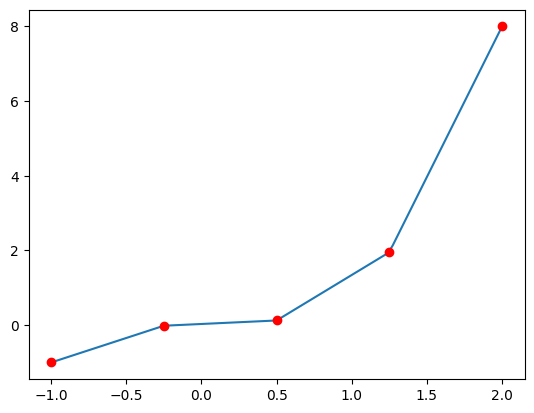

In [ ]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

In [ ]:
plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [ ]:
interp.interp1d?

In [ ]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters

In [ ]:
from scipy import optimize

In [ ]:
def f(x):
    return x**4 -10*x**2

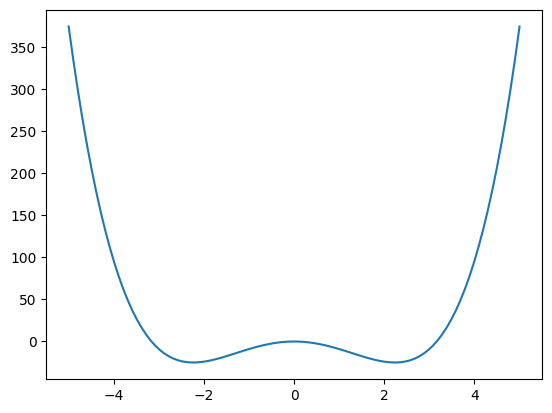

In [ ]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [ ]:
results = optimize.minimize(f, 4)
results

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.99999999999999
        x: [ 2.236e+00]
      nit: 7
      jac: [ 1.431e-06]
 hess_inv: [[ 2.497e-02]]
     nfev: 16
     njev: 8

In [ ]:
x_opt = results.x

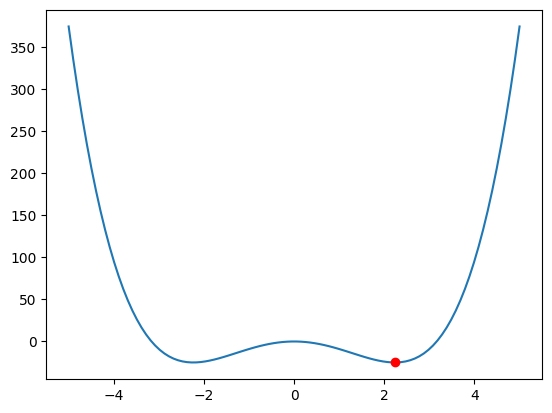

In [ ]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [ ]:
optimize.minimize?

In [ ]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]) )

In [ ]:
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

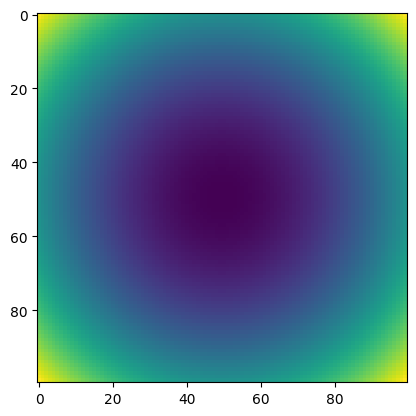

In [ ]:
plt.imshow(X**2+Y**2)

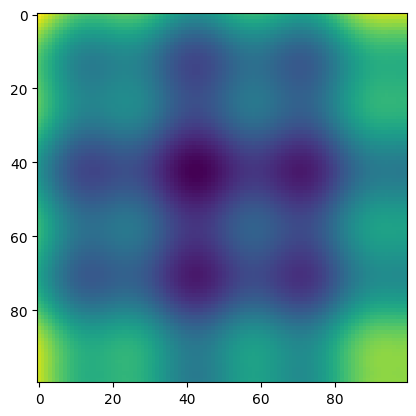

In [ ]:
plt.imshow(f(np.array([X,Y])))

In [ ]:
optimize.minimize(f,x0=[-1,1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.399749751160588
        x: [-7.138e-01  2.136e+00]
      nit: 9
      jac: [-5.960e-08  5.960e-08]
 hess_inv: [[ 4.597e-02 -6.403e-07]
            [-6.403e-07  4.980e-02]]
     nfev: 42
     njev: 14

## Curve Fitting

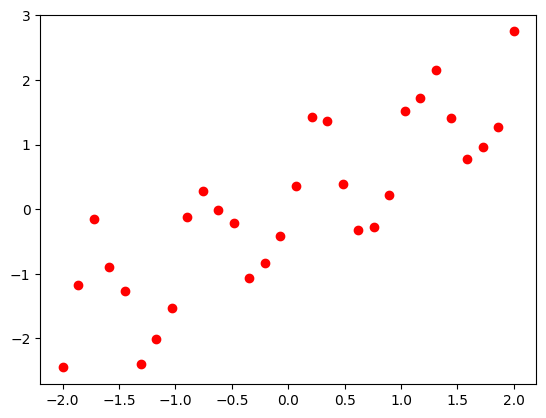

In [ ]:
x = np.linspace(-2,2,30)
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [ ]:
def f(x,a,b):
    return a*x +b

In [ ]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,0))
a,b

(0.8935331155867625, 0.04920074774879323)

In [ ]:
optimize.curve_fit?

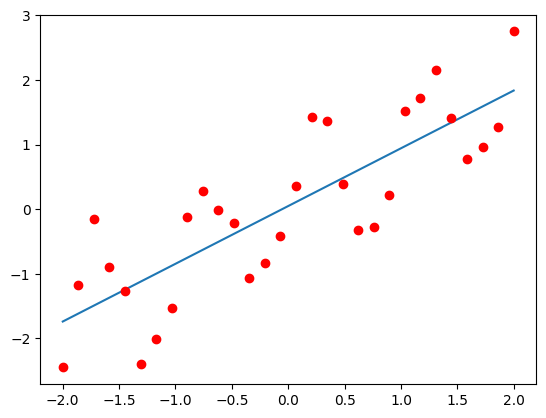

In [ ]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [ ]:
def g(x,a,b):
    return a*x +b*np.sin(6.5*x)

In [ ]:
((a,b),_) = optimize.curve_fit(g,x,y,(0,0))
a,b

In [ ]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b))
plt.plot(x,y,'ro')

### Root Finding

In [ ]:
def f(x):
    return np.sin(x)

In [ ]:
optimize.root(f,-1)

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise 6
Using Google and reading documentation are important parts of programming. `scipy.optimize` comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix}
$$

## Statistics : `scipy.stats`

In [ ]:
from scipy import stats

Find the maximum likelihood estimate for parameters

In [ ]:
samples = 3*np.random.randn(1000)+2
plt.hist(samples);

In [ ]:
stats.norm.fit(samples)

In [ ]:
a = np.random.randn(300)
b = np.random.randn(300) + 0.1

In [ ]:
stats.ttest_ind(a,b)

You can also perform kernel density estimation

In [ ]:
x = np.hstack(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

In [ ]:
plt.hist(x);

In [ ]:
pdf = stats.kde.gaussian_kde(x)

In [ ]:
type(pdf)

In [ ]:
counts,bins,_ = plt.hist(x)
x_fine=np.linspace(-2,10,100)
plt.plot(x_fine,np.sum(counts)*pdf(x_fine))

## Numerical Integration : `scipy.integrate`

In [ ]:
import scipy.integrate as integ

You can compute integral using the `quad` funtion

In [ ]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [ ]:
integ.quad(f,-1,1)

In [ ]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [ ]:
def f(y,t):
    return (y[1], -y[1]-9*y[0])

In [ ]:
t = np.linspace(0,10,100)
Y = integ.odeint(f,[1,1],t)

In [ ]:
plt.plot(t,Y[:,1])

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [ ]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [ ]:
np.linspace(0, 50, 20)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## Exercise 7
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)


In [ ]:
nx.draw?

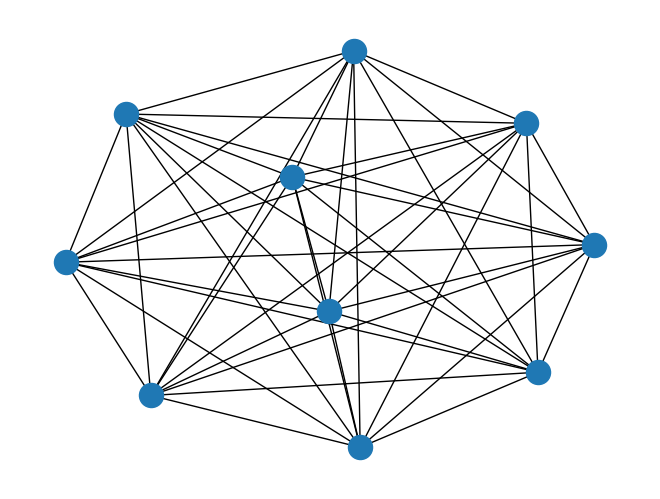

In [ ]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

In [ ]:
from sympy import *

In [ ]:
x,y = symbols("x y")

In [ ]:
x

In [ ]:
expr = x+y**2

In [ ]:
expr

In [ ]:
# in colab run this to get latex output
# init_printing(use_latex='matplotlib')

In [ ]:
x*expr

In [ ]:
expand(x*expr)

In [ ]:
factor(x**2 -2*x*y + y**2)

In [ ]:
latex(expr)

In [ ]:
simplify( (x-y)**2 + (x+y)**2)

In [ ]:
x**2/(y**3+y)

In [ ]:
(x**2/(y**3+y)).subs(y,1/(1+x)).simplify()

In [ ]:
(x**2/(y**3+y)).evalf(subs={'x':2, 'y':4})

In [ ]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [ ]:
I.doit()

In [ ]:
(sin(x)/(1+cos(x)))

In [ ]:
(sin(x)/(1+cos(x))).series(x,0,10)

## Extra Exercises
The following exercises requires the combined usage of the packages we learnt today.

1. Generate 10 random polynomials of order 5
    - Numerically and analytically integrate them from 0 to 1 and compare the answers.
    - Compute a minima for each polynomial and if it exists show that the analytically computed derivative is 0 at the minima
    - Randomly sample the polynomials in the range from 0 to 1, and see if you can recover the original coefficents by trying to fit a 5th order polynomial to the samples.
2. Read and learn about [Erdos-Renyi Random Graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). See if you can numerically verify some of the properties mentioned in the wiki, such as for what parameter values is the graph most likely connected.